# Data Understanding

The purpose of this notebook is to perform analysis on the dataset in order to provide insightful statistics of the image data.

In [3]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Vars

ROOT_DIR = os.path.dirname(os.getcwd())
DATASET_DIR = os.path.join(ROOT_DIR, 'dataset')
MALE_DIR = os.path.join(DATASET_DIR, 'male')
FEMALE_DIR = os.path.join(DATASET_DIR, 'female')

MALE_LABELS = [1] * len(os.listdir(MALE_DIR))
FEMALE_LABELS = [0] * len(os.listdir(FEMALE_DIR))

In [5]:
# Create DataFrame of filepaths and labels

male_files = [os.path.join(MALE_DIR, file) for file in os.listdir(MALE_DIR)]
female_files = [os.path.join(FEMALE_DIR, file) for file in os.listdir(FEMALE_DIR)]

data = {
    'file': male_files + female_files,
    'gender': MALE_LABELS + FEMALE_LABELS
}

df = pd.DataFrame(data=data)

In [4]:
df.head()

,file,gender
0,/workspaces/genderpredictor/dataset/male/15355...,1
1,/workspaces/genderpredictor/dataset/male/12016...,1
2,/workspaces/genderpredictor/dataset/male/13787...,1
3,/workspaces/genderpredictor/dataset/male/05992...,1
4,/workspaces/genderpredictor/dataset/male/09958...,1


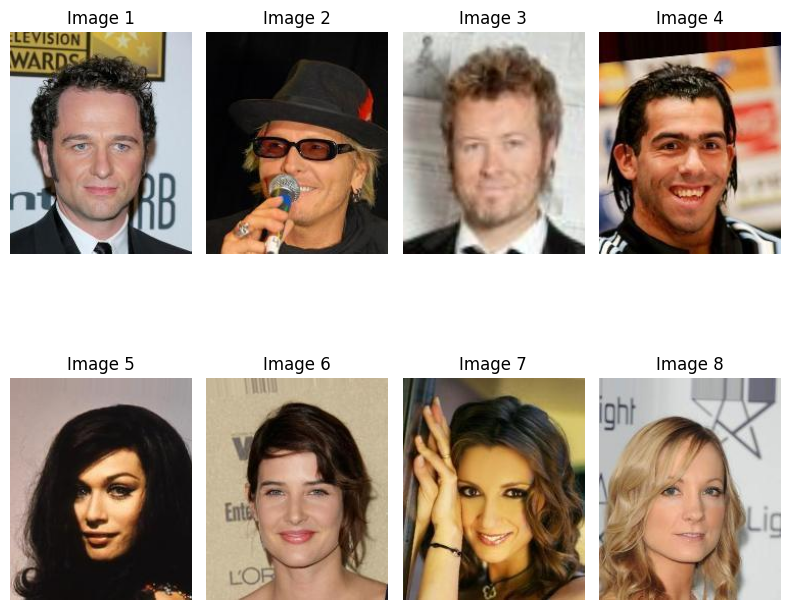

In [6]:
# Image montage / Sample of dataset

sample_size = 8 # Total number of images

male_df = df[df['gender'] == 1]
female_df = df[df['gender'] == 0]

sample_male = male_df.sample(n=round(sample_size / 2))
sample_female = female_df.sample(n=round(sample_size / 2))

sample = pd.concat([sample_male, sample_female])


cols = 4  # Number of columns in the montage
rows = (sample_size + cols - 1) // cols  # Calculate the number of rows

fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

for i, image_path in enumerate(sample['file']):
    ax = axes[i // cols, i % cols]
    img = plt.imread(image_path)
    ax.imshow(img)
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

# Remove any empty subplots
for i in range(sample_size, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Delete references for garbage collection
del sample
del sample_male
del sample_female
del male_df
del female_df


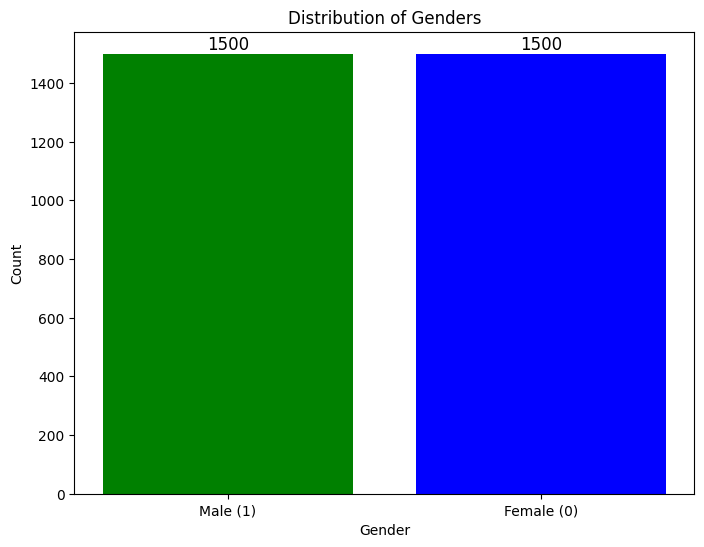

In [6]:
# Label distribution

gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts, color=['blue', 'green'])
plt.xticks(gender_counts.index, ['Female (0)', 'Male (1)'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=12)

plt.show()

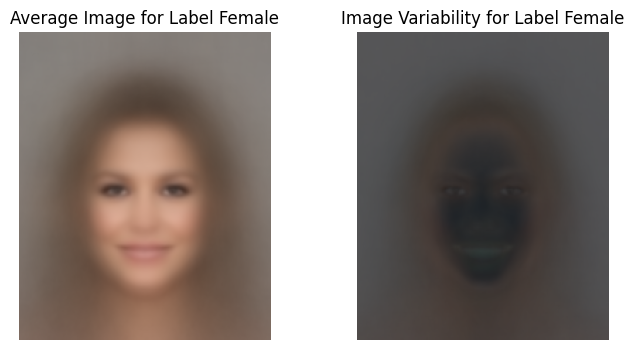

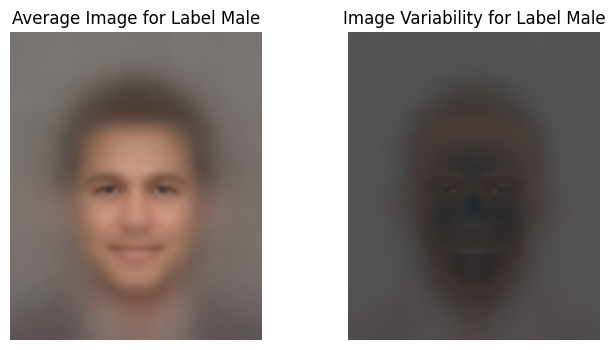

In [7]:
# Average image and image variability

X = [plt.imread(file) for file in df['file']]
X = np.array(X)
y = df['gender'].values

unique_labels = np.unique(y)

avg_images = {}
std_images = {}

# Calculate average and std images for each label
for label in unique_labels:
    # Filter images for the current label
    label_images = X[y == label]
    
    # Calculate average image and standard deviation image
    avg_img = np.mean(label_images, axis=0)
    std_img = np.std(label_images, axis=0)

    # Normalize pixels
    avg_img /= 255.0
    std_img /= 255.0
    
    # Store results in dictionaries
    avg_images[label] = avg_img
    std_images[label] = std_img

# Display average and std images for each label
for label in unique_labels:
    plt.figure(figsize=(8, 4))
    
    # Average Image
    plt.subplot(1, 2, 1)
    plt.title(f"Average Image for Label {'Male' if label == 1 else 'Female'}")
    plt.imshow(avg_images[label], cmap='gray')
    plt.axis('off')
    
    # Image Variability (Standard Deviation) Image
    plt.subplot(1, 2, 2)
    plt.title(f"Image Variability for Label {'Male' if label == 1 else 'Female'}")
    plt.imshow(std_images[label], cmap='gray')
    plt.axis('off')
    
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


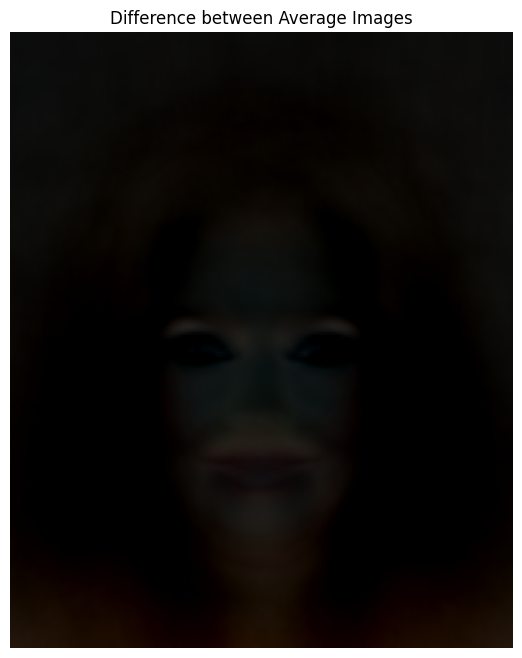

In [16]:
# Difference between average male and average female

avg_difference = avg_images[0] - avg_images[1]

# Plot the difference between the average images
plt.figure(figsize=(8, 8))
plt.imshow(avg_difference, cmap='gray')
plt.title('Difference between Average Images')
plt.axis('off')
plt.show()